In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.integrate import quad

In [68]:
G = 6.67e-11            #Gravational Constant         m^3/kg/s^2
M_earth = 5.9e24        #Mass of the Earth            kg
M_moon = 7.3e22         #Mass of the Moon             kg
R_earth = 6378          #Radius of the Earth          km
R_moon = 1737           #Radius of the Moon           km
d_earthtomoon = 3.8e8   #Distacne from Earth to Moon  km

**PART 1: The Gravitational Potential of the Earth**

In [69]:
def Gravitational_potential(M, Xm, Ym, x, y):
    r = np.sqrt((x - Xm)**2 + (y - Ym)**2)
    with np.errstate(divide = 'ignore', invalid = 'ignore'):
        phi = -G*M/r
        phi[r == 0] = np.nan
    return phi

In [70]:
x_values = np.linspace(R_earth, 1.5*d_earthtomoon, 250)
phi_values = np.abs(Gravitational_potential(M_earth, 0 ,0 , x_values, np.zeros_like(x_values)))

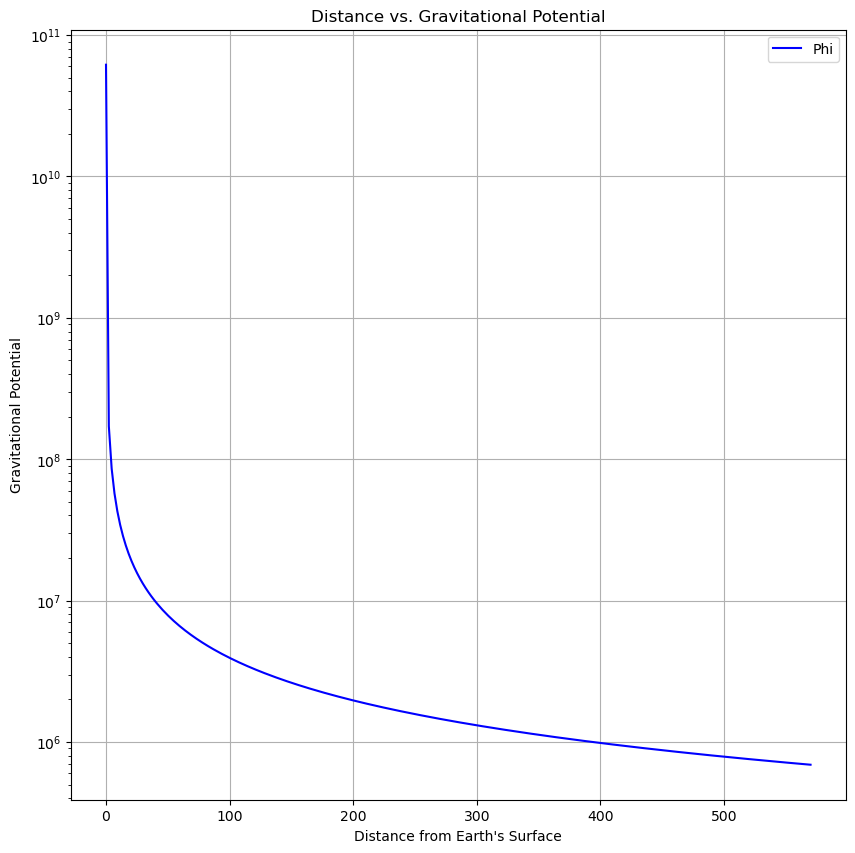

In [71]:
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.plot(x_values/1E6, phi_values, label = 'Phi', color = 'b')
ax1.set_yscale('log')
ax1.set_xlabel("Distance from Earth's Surface")
ax1.set_ylabel("Gravitational Potential")
ax1.set_title("Distance vs. Gravitational Potential")
ax1.grid(True)
ax1.legend()

In [92]:
x_range = np.linspace(-1.5*d_earthtomoon, 1.5*d_earthtomoon, 500)
y_range = np.linspace(-1.5*d_earthtomoon, 1.5*d_earthtomoon, 500)
X, Y = np.meshgrid(x_range, y_range)
phi_mesh = np.abs(Gravitational_potential(M_earth, 0, 0, X, Y))

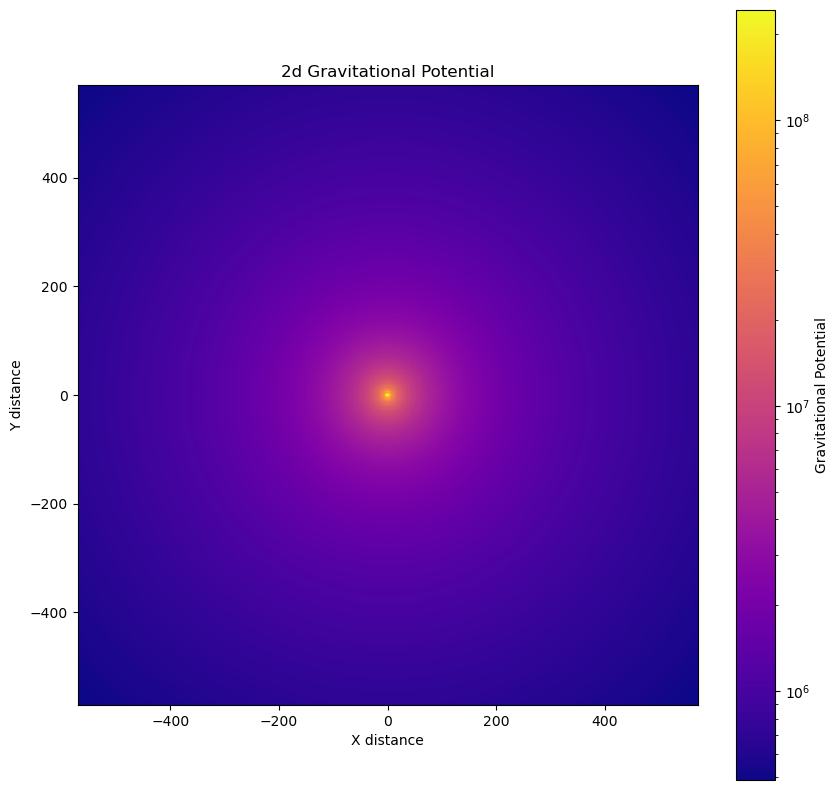

In [93]:
fig, ax2 = plt.subplots(figsize=(10, 10))
c = ax2.pcolormesh(X/1E6, Y/1E6, phi_mesh, norm = LogNorm(), cmap = 'plasma')
plt.colorbar(c, label = "Gravitational Potential")
ax2.set_xlabel("X distance")
ax2.set_ylabel("Y distance")
ax2.set_title("2d Gravitational Potential")
ax2.set_aspect('equal')

**Part 2: The Gravational Potential of the Earth-Moon System**

In [94]:
x_earth, y_earth = 0, 0
x_moon, y_moon = d_earthtomoon/np.sqrt(2), d_earthtomoon/np.sqrt(2)

In [95]:
grid_points = 500
x_range_em = np.linspace(-1.5*d_earthtomoon, 1.5*d_earthtomoon, grid_points)
y_range_em = np.linspace(-1.5*d_earthtomoon, 1.5*d_earthtomoon, grid_points)
X_em, Y_em = np.meshgrid(x_range_em, y_range_em)

In [96]:
r_earth = np.sqrt((X - x_earth)**2 + (Y - y_earth)**2)
r_moon = np.sqrt((X - x_moon)**2 + (Y - y_moon)**2)
V = - G*M_earth/np.where(r_earth == 0, np.inf, r_earth) - G*M_moon/np.where(r_moon == 0, np.inf, r_moon)
vmin, vmax = np.abs(V).min(), np.abs(V).max()

Text(0, 0.5, 'Y')

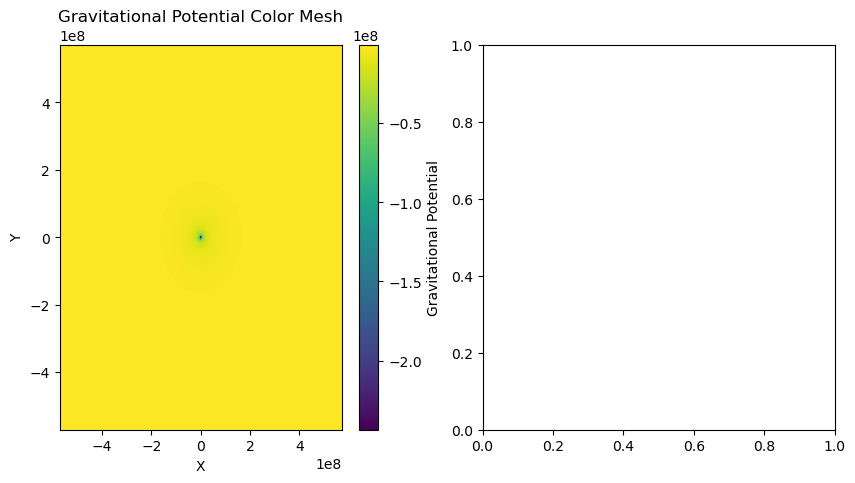

In [98]:
fig, ax3 = plt.subplots(1, 2, figsize = (10, 5))
cmesh = ax3[0].pcolormesh(X_em, Y_em, V, shading = 'auto', cmap = 'viridis')
fig.colorbar(cmesh, ax = ax3[0], label = "Gravitational Potential")
ax3[0].set_title("Gravitational Potential Color Mesh")
ax3[0].set_xlabel('X')
ax3[0].set_ylabel('Y')                

Text(24.000000000000007, 0.5, 'Y')

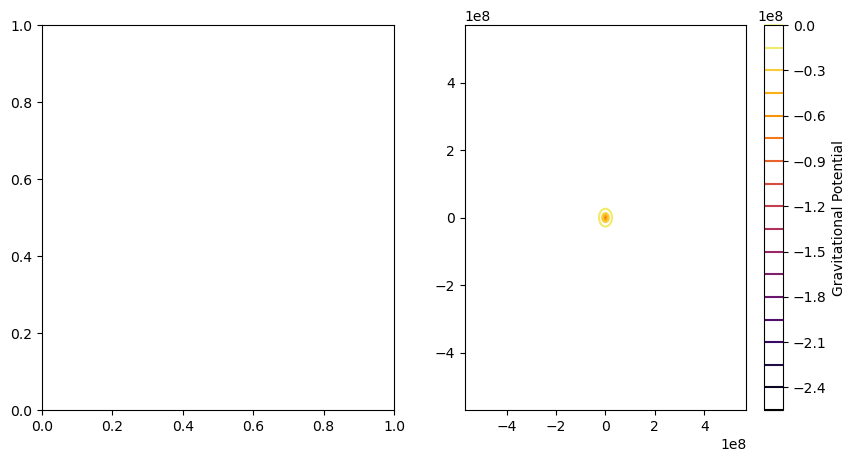

In [101]:
fig, ax4 = plt.subplots(1, 2, figsize = (10, 5))
contour = ax4[1].contour(X_em, Y_em, V, levels = 20, cmap = 'inferno')
fig.colorbar(contour, ax = ax4[1], label = "Gravitational Potential")
ax3[0].set_title("Gravitational Potential Contour")
ax3[0].set_xlabel('X')
ax3[0].set_ylabel('Y')

**PART 3: THE GRAVITATIONAL FORCE FIELD OF THE EARTH-MOON SYSTEM**

In [102]:
def Gravitational_force(M1, m2, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    r2 = dx**2 + dy**2
    if r2 == 0:
        return 0, 0
    r = np.sqrt(r2)
    F = G*M1*m2/r2
    Fx = F * dx/r
    Fy = F * dy/r
    return Fx, Fy

In [103]:
x_emf = np.linspace(-1.5*d_earthtomoon, 1.5*d_earthtomoon, 15)
y_emf = np.linspace(-1.5*d_earthtomoon, 1.5*d_earthtomoon, 15)
X_emf, Y_emf = np.meshgrid(x_emf, y_emf)
Fx_total = np.zeros(X.shape)
Fy_total = np.zeros(Y.shape)

In [104]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Fx1, Fy1 = Gravitational_force(M_earth, 1, x_earth, y_earth, X[i, j], Y[i, j])
        Fx2, Fy2 = Gravitational_force(M_moon, 1, x_moon, y_moon, X[i, j], Y[i, j])
        Fx_total[i, j] = Fx1 + Fx2
        Fy_total[i, j] = Fy1 + Fy2

Text(0.5, 1.0, 'Gravitational Force Field of the Earth&Moon System')

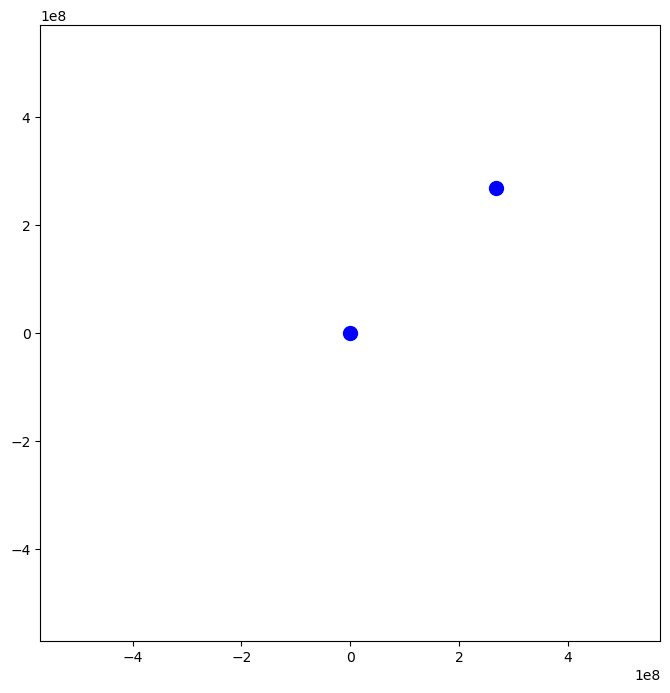

In [126]:
fig, ax = plt.subplots(figsize= (8, 8))
mag = np.sqrt(Fx_total**2 + Fy_total**2)
# stream = ax.streamplot(X_emf, Y_emf, Fx_total, Fy_total, cmap = 'inferno')
# cbar = plt.colorbar(stream.lines, ax = ax)
# cbar.set_label('Log Force Magnitude')
ax.scatter([x_earth, x_moon], [y_earth, y_moon], color = 'blue', s = 100, label = "Earth and Moon")
ax.set_xlim(-1.5*d_earthtomoon, 1.5*d_earthtomoon)
ax.set_ylim(-1.5*d_earthtomoon, 1.5*d_earthtomoon)
ax1.set_xlabel("X position")
ax1.set_ylabel("Y position")
ax1.set_title("Gravitational Force Field of the Earth&Moon System")

**PART 4: ALTITUDE OF THE SATURN V ROCKET**

In [112]:
m0 = 2.4E3          #
mf = 7.5E5          #
m_prime = 1.3E4     #
Ve = 2580           #
g = 9.81            #

In [116]:
def burn_time(m0, mf, m_prime):
    return (m0 - mf)/m_prime
def delta_v(t, m0, mf, m_prime, Ve, g):
    m_t = m0 - m_prime*t
    if m_t <= mf:
        return 0
    return Ve * np.log(m0/m_t)-g*t
def altitude(m0, mf, m_prime, Ve, g):
    T = burn_time(m0, mf, m_prime)
    h, _ = quad(delta_v, 0, T, args = (m0, mf, m_prime, Ve, g))
    return h

In [117]:
T = burn_time(m0, mf, m_prime)
h = altitude(m0, mf, m_prime, Ve, g)
print(f"'Burn Time (T): {T:.2f} s")
print(f"'Altitude at burnout): {h:.2f} m")

'Burn Time (T): -57.51 s
'Altitude at burnout): -0.00 m


In [118]:
t_values = np.linspace(0, T, 1000)
v_values = [delta_v(t, m0, mf, m_prime, Ve, g) for t in t_values]

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

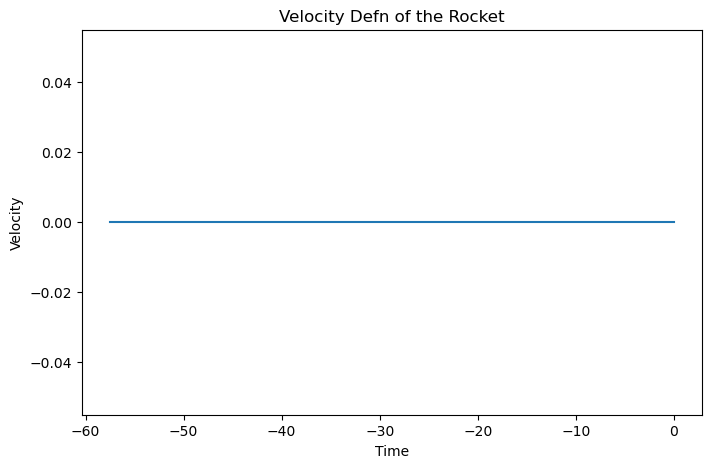

In [119]:
plt.figure(figsize = (8, 5))
plt.plot(t_values, v_values, label = "Velocity")
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity Defn of the Rocket')
plt.legend
plt.grid